**Step 1: Setup and Install Libraries**

In [1]:
!pip install matplotlib seaborn scikit-learn opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.6 MB/s eta 0:00:00


**Step 2: Import Libraries**


In [2]:
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


**Step 3: Load the Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
dataset_zip_path = '/content/drive/MyDrive/Dataset/MangoLeafBD.zip'


**Step 4: Extract the Zip File**

In [6]:
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/mango_leaf_dataset')


**Step 5: Load and Preprocess Images**

In [7]:
import os
import cv2
import numpy as np

# Set the directory where the dataset is located
data_dir = '/content/mango_leaf_dataset'

# Initialize lists to store image data and labels
images = []
labels = []

# Define common image file extensions
valid_image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff'}

# Walk through each directory and subdirectory in the dataset
for root, dirs, files in os.walk(data_dir):
    # Extract the folder name as the label (assumes the last directory name is the label)
    disease_label = os.path.basename(root)

    # Loop through files in the current directory
    for img_file in files:
        # Check if the file has a valid image extension
        file_ext = os.path.splitext(img_file)[1].lower()
        if file_ext in valid_image_extensions:
            img_path = os.path.join(root, img_file)
            img = cv2.imread(img_path)

            # Only proceed if the image was successfully read
            if img is not None:
                try:
                    # Resize all images to 128x128
                    img = cv2.resize(img, (128, 128))
                    images.append(img)
                    labels.append(disease_label)  # Use folder name as label
                except Exception as e:
                    print(f"Error resizing image {img_path}: {e}")
            else:
                print(f"Warning: Could not read image {img_path}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display the shape of the loaded data for confirmation
print(f"Loaded {len(images)} images with shape {images.shape} and {len(labels)} labels.")


Loaded 4000 images with shape (4000, 128, 128, 3) and 4000 labels.


**Step 6: Encode Labels and Split Data**

**Encode Labels:** Convert categorical labels to numeric values.

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


**Split Data** into training and testing sets.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


**Step 7: Perform Exploratory Data Analysis (EDA)**


**Visualize Class Distribution:**



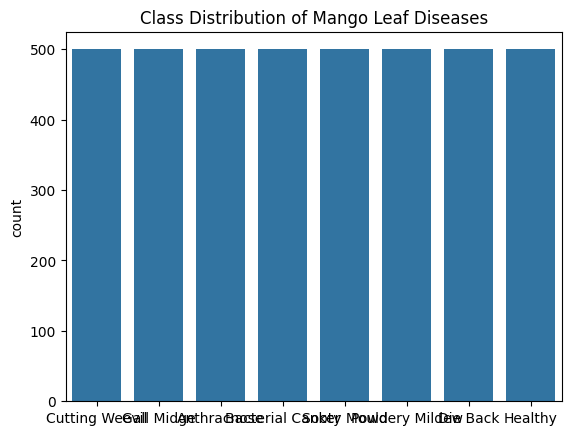

In [10]:
sns.countplot(x=labels)
plt.title("Class Distribution of Mango Leaf Diseases")
plt.show()


**Display Sample Images:**



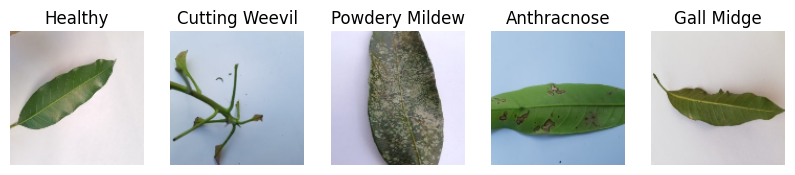

In [11]:
def plot_samples(images, labels, n=5):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(label_encoder.inverse_transform([labels[i]])[0])
        plt.axis("off")
    plt.show()

plot_samples(X_train, y_train)


**Step 8: Flatten Images for Model Input**


In [12]:
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)


**Step 9: Train Models**


**Decision Tree Classifier:**


In [13]:
# Initialize and train Decision Tree classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_flat, y_train)


DecisionTreeClassifier(random_state=42)

**Random Forest Classifier:**



In [14]:
# Initialize and train Random Forest classifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_flat, y_train)


RandomForestClassifier(random_state=42)

**Step 10: Evaluate Models**


**Predict and Evaluate:**



In [15]:
# Decision Tree Evaluation
dt_predictions = dt_model.predict(X_test_flat)
# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions, target_names=label_encoder.classes_))

# Random Forest Evaluation
rf_predictions = rf_model.predict(X_test_flat)
# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=label_encoder.classes_))


Decision Tree Accuracy: 0.69625
Decision Tree Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.69      0.69      0.69       112
Bacterial Canker       0.75      0.81      0.78       101
  Cutting Weevil       0.89      0.89      0.89       123
        Die Back       0.85      0.77      0.81        91
      Gall Midge       0.52      0.57      0.54        86
         Healthy       0.69      0.66      0.67        93
  Powdery Mildew       0.56      0.62      0.59        90
     Sooty Mould       0.58      0.50      0.54       104

        accuracy                           0.70       800
       macro avg       0.69      0.69      0.69       800
    weighted avg       0.70      0.70      0.70       800

Random Forest Accuracy: 0.88625
Random Forest Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.92      0.88      0.89       112
Bacterial Canker       0.88      0.90      0.8

**Confusion Matrix:**


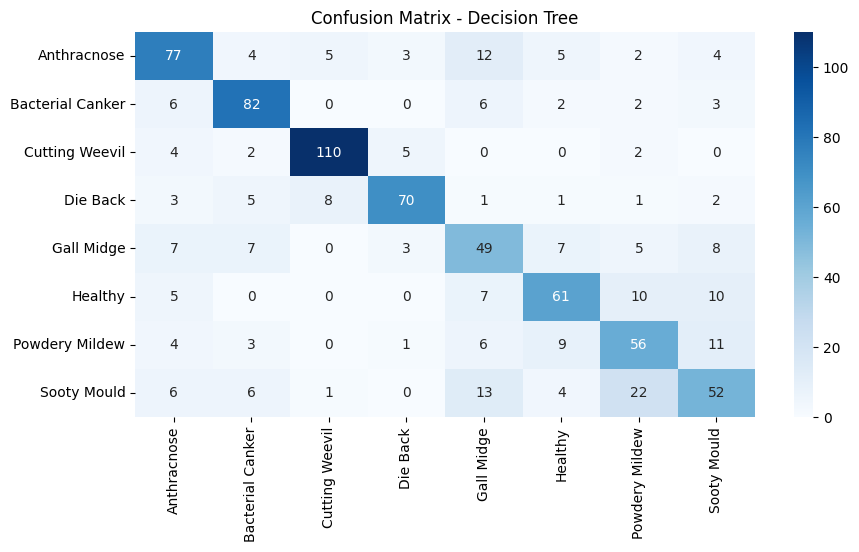

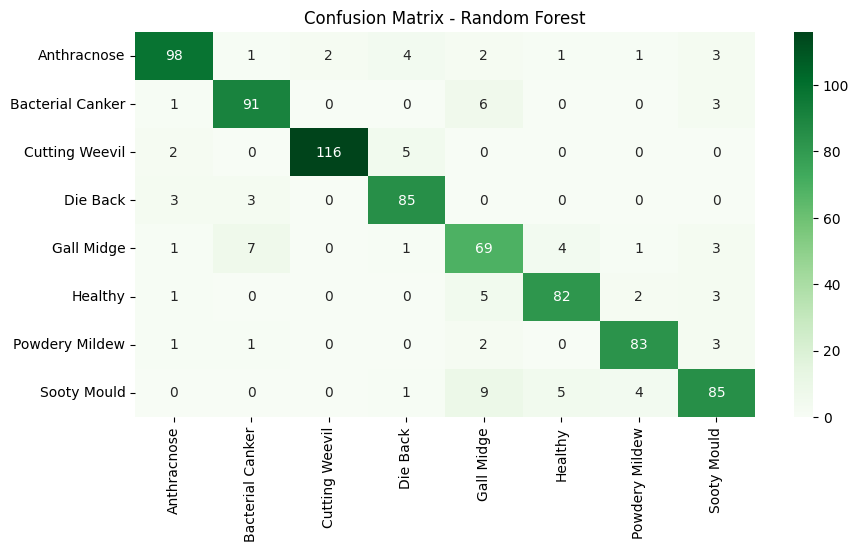

In [16]:
# Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt="d", cmap="Greens",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.show()
